# RNN 실습

## 뉴스 카테고리 분류

In [ ]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,LSTM,Embedding
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [ ]:
# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [ ]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [ ]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [ ]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 10s 21ms/step - loss: 2.9665 - accuracy: 0.3179 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 1s 13ms/step - loss: 2.0567 - accuracy: 0.4787 - val_loss: 1.9571 - val_accuracy: 0.5067
Epoch 3/20
90/90 [==============================] - 1s 13ms/step - loss: 1.9226 - accuracy: 0.5094 - val_loss: 1.8247 - val_accuracy: 0.5276
Epoch 4/20
90/90 [==============================] - 1s 13ms/step - loss: 1.7704 - accuracy: 0.5380 - val_loss: 1.8054 - val_accuracy: 0.5396
Epoch 5/20
90/90 [==============================] - 1s 13ms/step - loss: 1.7909 - accuracy: 0.5182 - val_loss: 1.6961 - val_accuracy: 0.5663
Epoch 6/20
90/90 [==============================] - 1s 13ms/step - loss: 1.6659 - accuracy: 0.5728 - val_loss: 1.6630 - val_accuracy: 0.5837
Epoch 7/20
90/90 [==============================] - 1s 12ms/step - loss: 1.6435 - accuracy: 0.5794 - val_loss: 1.6226 - val_accuracy: 0.5984
Epoch 8/20
9

In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 0s 6ms/step - loss: 1.2043 - accuracy: 0.7124

 Test Accuracy: 0.7124


In [ ]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

In [ ]:
# 학습셋의 오차
y_loss = history.history['loss']

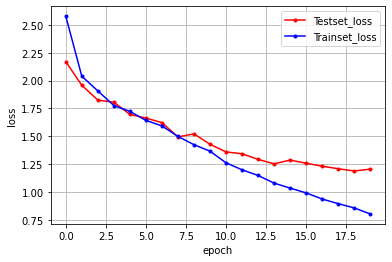

In [ ]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## IMDB 데이터셋 감성 분석

In [ ]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [ ]:
# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

### 실습: 위의 RNN 텍스트 분류 코드를 참고하여 IMDB 감성 분석을 실시해보세요.

In [ ]:
# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [ ]:
x_train

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]], dtype=int32)

In [ ]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                

In [ ]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 6s 16ms/step - loss: 0.5558 - accuracy: 0.6809 - val_loss: 0.3678 - val_accuracy: 0.8377
Epoch 2/5
250/250 [==============================] - 4s 15ms/step - loss: 0.2922 - accuracy: 0.8797 - val_loss: 0.3335 - val_accuracy: 0.8562
Epoch 3/5
250/250 [==============================] - 4s 15ms/step - loss: 0.2424 - accuracy: 0.8999 - val_loss: 0.3246 - val_accuracy: 0.8594
Epoch 4/5
250/250 [==============================] - 4s 15ms/step - loss: 0.2000 - accuracy: 0.9229 - val_loss: 0.3286 - val_accuracy: 0.8555
Epoch 5/5
250/250 [==============================] - 4s 15ms/step - loss: 0.1703 - accuracy: 0.9375 - val_loss: 0.3489 - val_accuracy: 0.8555


In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 3s 3ms/step - loss: 0.3489 - accuracy: 0.8555

 Test Accuracy: 0.8555


In [ ]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

In [ ]:
# 학습셋의 오차
y_loss = history.history['loss']

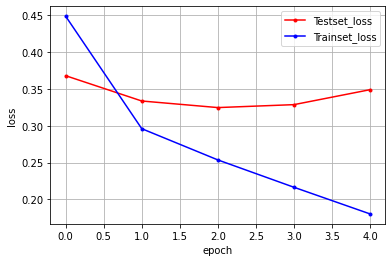

In [ ]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## E-commerce 여성 이용자 리뷰 텍스트 생성

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1W22DJxMQCSpVIrgzS3V1fpckQ2Jjjsj-/view?usp=sharing'
file_id = orig_url.split('/')[-2] #파일 id 추출
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id #다운로드 url 지정
url = requests.get(dwn_url).text #dwn_url을 통해 request
csv_raw = StringIO(url) #객체 처리
df = pd.read_csv(csv_raw) #추출된 url read

In [ ]:
df = df.sample(1000)

In [ ]:
print(f'Shape of data: {df.shape}')
# Find the number of missing values
print(df.info())

Shape of data: (1000, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 12906 to 4853
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1000 non-null   int64 
 1   Clothing ID              1000 non-null   int64 
 2   Age                      1000 non-null   int64 
 3   Title                    849 non-null    object
 4   Review Text              965 non-null    object
 5   Rating                   1000 non-null   int64 
 6   Recommended IND          1000 non-null   int64 
 7   Positive Feedback Count  1000 non-null   int64 
 8   Division Name            998 non-null    object
 9   Department Name          998 non-null    object
 10  Class Name               998 non-null    object
dtypes: int64(6), object(5)
memory usage: 93.8+ KB
None


In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Review Text'].astype(str).str.lower())

total_words = len(tokenizer.word_index)+1
tokenized_sentences = tokenizer.texts_to_sequences(df['Review Text'].astype(str))

In [ ]:
# Slash sequences into n gram sequence
input_sequences = list()
for i in tokenized_sentences:
    for t in range(1, len(i)):
        n_gram_sequence = i[:t+1]
        input_sequences.append(n_gram_sequence)

# Pre pad with max sequence length
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
import os

In [ ]:
tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)

# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)

with strategy.scope():
  model = Sequential()
  model.add(Embedding(total_words, 40, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(500)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=4, verbose=0, mode='auto')

In [ ]:
history = model.fit(xs, ys, epochs=40, verbose=1, callbacks=[earlystop], batch_size = 256)

Epoch 1/40
227/227 [==============================] - 22s 60ms/step - loss: 6.4254 - accuracy: 0.0502
Epoch 2/40
227/227 [==============================] - 10s 44ms/step - loss: 5.7334 - accuracy: 0.0704
Epoch 3/40
227/227 [==============================] - 10s 46ms/step - loss: 5.2564 - accuracy: 0.1192
Epoch 4/40
227/227 [==============================] - 10s 45ms/step - loss: 4.8234 - accuracy: 0.1475
Epoch 5/40
227/227 [==============================] - 10s 44ms/step - loss: 4.4725 - accuracy: 0.1714
Epoch 6/40
227/227 [==============================] - 10s 44ms/step - loss: 4.0945 - accuracy: 0.1999
Epoch 7/40
227/227 [==============================] - 10s 45ms/step - loss: 3.7152 - accuracy: 0.2295
Epoch 8/40
227/227 [==============================] - 10s 44ms/step - loss: 3.3749 - accuracy: 0.2740
Epoch 9/40
227/227 [==============================] - 10s 44ms/step - loss: 3.0084 - accuracy: 0.3328
Epoch 10/40
227/227 [==============================] - 10s 44ms/step - loss: 2.664

In [ ]:
model.save("/content/drive/My Drive/model/RNN_Generation.h5")

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/model/RNN_Generation.h5')

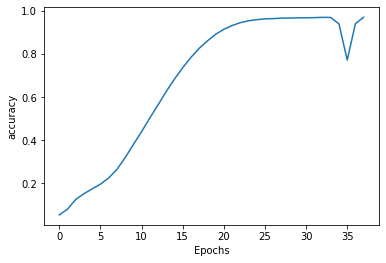

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, 'accuracy')

In [ ]:
def complete_this_paragraph(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [ ]:
complete_this_paragraph("this is a good", 40)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


"this is a good shirt with lots of quality touches and something which is easy to wear and appropriate for many occasions however the dress i received wasn't quite like the dress pictured in the catalog and main website photos the bottom buttons of"

In [ ]:
complete_this_paragraph("i loved that dress", 40)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'i loved that dress this was one of the photo but the dress is very off a little look on me so bad i thought it would be a tad big i sized up it would be too beautiful or for petite wear me'

In [ ]:
complete_this_paragraph("This shirt is so", 40)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'This shirt is so cute with skinny jeans and crossbody bag i am 34b so i did not have the issue with the cut of top at the bustline love it to the only be disappointed and it is definitely right as you have'

## 어텐션 메커니즘 기반 언어 번역 모델 구현

In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 파일을 다운로드합니다.
path_to_zip = tf.keras.utils.get_file(
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

path_to_file = os.path.dirname(path_to_zip)+"/spa-eng/spa.txt"

2646016/2638744 [==============================] - 0s 0us/step


In [ ]:
# 유니코드 파일을 아스키 코드 파일로 변환합니다.
def unicode_to_ascii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
  w = unicode_to_ascii(w.lower().strip())

  # 단어와 단어 뒤에 오는 구두점(.)사이에 공백을 생성합니다.
  # 예시: "he is a boy." => "he is a boy ."
  # 참고:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
  w = re.sub(r"([?.!,¿])", r" \1 ", w)
  w = re.sub(r'[" "]+', " ", w)

  # (a-z, A-Z, ".", "?", "!", ",")을 제외한 모든 것을 공백으로 대체합니다.
  w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)

  w = w.strip()

  # 모델이 예측을 시작하거나 중단할 때를 알게 하기 위해서
  # 문장에 start와 end 토큰을 추가합니다.
  w = '<start> ' + w + ' <end>'
  return w

In [ ]:
en_sentence = u"May I borrow this book?"
sp_sentence = u"¿Puedo tomar prestado este libro?"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence).encode('utf-8'))

<start> may i borrow this book ? <end>
b'<start> \xc2\xbf puedo tomar prestado este libro ? <end>'


In [ ]:
# 1. 문장에 있는 억양을 제거합니다.
# 2. 불필요한 문자를 제거하여 문장을 정리합니다.
# 3. 다음과 같은 형식으로 문장의 쌍을 반환합니다: [영어, 스페인어]
def create_dataset(path, num_examples):
  lines = io.open(path, encoding='UTF-8').read().strip().split('\n')

  word_pairs = [[preprocess_sentence(w) for w in l.split('\t')]  for l in lines[:num_examples]]

  return zip(*word_pairs)

In [ ]:
en, sp = create_dataset(path_to_file, None)
print(en[-1])
print(sp[-1])

<start> if you want to sound like a native speaker , you must be willing to practice saying the same sentence over and over in the same way that banjo players practice the same phrase over and over until they can play it correctly and at the desired tempo . <end>
<start> si quieres sonar como un hablante nativo , debes estar dispuesto a practicar diciendo la misma frase una y otra vez de la misma manera en que un musico de banjo practica el mismo fraseo una y otra vez hasta que lo puedan tocar correctamente y en el tiempo esperado . <end>


In [ ]:
def tokenize(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
      filters='')
  lang_tokenizer.fit_on_texts(lang)

  tensor = lang_tokenizer.texts_to_sequences(lang)

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')

  return tensor, lang_tokenizer

In [ ]:
def load_dataset(path, num_examples=None):
  # 전처리된 타겟 문장과 입력 문장 쌍을 생성합니다.
  targ_lang, inp_lang = create_dataset(path, num_examples)

  input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
  target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

  return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [ ]:
# 언어 데이터셋을 아래의 크기로 제한하여 훈련과 검증을 수행합니다.
num_examples = 30000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)

# 타겟 텐서와 입력 텐서의 최대 길이를 계산합니다.
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

In [ ]:
# 훈련 집합과 검증 집합을 80대 20으로 분리합니다.
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# 훈련 집합과 검증 집합의 데이터 크기를 출력합니다.
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

24000 24000 6000 6000


In [ ]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

In [ ]:
print ("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[0])
print ()
print ("Target Language; index to word mapping")
convert(targ_lang, target_tensor_train[0])

Input Language; index to word mapping
1 ----> <start>
6 ----> ¿
38 ----> puedo
123 ----> hacer
21 ----> una
700 ----> pregunta
5 ----> ?
2 ----> <end>

Target Language; index to word mapping
1 ----> <start>
96 ----> may
4 ----> i
171 ----> ask
9 ----> a
842 ----> question
7 ----> ?
2 ----> <end>


In [ ]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 16]), TensorShape([64, 11]))

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# 샘플 입력
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 16, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # 쿼리 은닉 상태(query hidden state)는 (batch_size, hidden size)쌍으로 이루어져 있습니다.
    # query_with_time_axis은 (batch_size, 1, hidden size)쌍으로 이루어져 있습니다.
    # values는 (batch_size, max_len, hidden size)쌍으로 이루어져 있습니다.
    # 스코어(score)계산을 위해 덧셈을 수행하고자 시간 축을 확장하여 아래의 과정을 수행합니다.
    query_with_time_axis = tf.expand_dims(query, 1)

    # score는 (batch_size, max_length, 1)쌍으로 이루어져 있습니다.
    # score를 self.V에 적용하기 때문에 마지막 축에 1을 얻습니다.
    # self.V에 적용하기 전에 텐서는 (batch_size, max_length, units)쌍으로 이루어져 있습니다.
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights는 (batch_size, max_length, 1)쌍으로 이루어져 있습니다.
    attention_weights = tf.nn.softmax(score, axis=1)

    # 덧셈이후 컨텍스트 벡터(context_vector)는 (batch_size, hidden_size)쌍으로 이루어져 있습니다.
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 16, 1)


In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # 어텐션을 사용합니다.
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output는 (batch_size, max_length, hidden_size)쌍으로 이루어져 있습니다.
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # 임베딩층을 통과한 후 x는 (batch_size, 1, embedding_dim)쌍으로 이루어져 있습니다.
    x = self.embedding(x)

    # 컨텍스트 벡터와 임베딩 결과를 결합한 이후 x의 형태는 (batch_size, 1, embedding_dim + hidden_size)쌍으로 이루어져 있습니다.
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # 위에서 결합된 벡터를 GRU에 전달합니다.
    output, state = self.gru(x)

    # output은 (batch_size * 1, hidden_size)쌍으로 이루어져 있습니다.
    output = tf.reshape(output, (-1, output.shape[2]))

    # output은 (batch_size, vocab)쌍으로 이루어져 있습니다.
    x = self.fc(output)

    return x, state, attention_weights

In [ ]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 4935)


In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [ ]:
checkpoint_dir = 'content/drive/My Drive/model/checkpoints/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

    # 교사 강요(teacher forcing) - 다음 입력으로 타겟을 피딩(feeding)합니다.
    for t in range(1, targ.shape[1]):
      # enc_output를 디코더에 전달합니다.
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # 교사 강요(teacher forcing)를 사용합니다.
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
"""EPOCHS = 10

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # 에포크가 2번 실행될때마다 모델 저장 (체크포인트)
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))"""

"EPOCHS = 10\n\nfor epoch in range(EPOCHS):\n  start = time.time()\n\n  enc_hidden = encoder.initialize_hidden_state()\n  total_loss = 0\n\n  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):\n    batch_loss = train_step(inp, targ, enc_hidden)\n    total_loss += batch_loss\n\n    if batch % 100 == 0:\n      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,\n                                                   batch,\n                                                   batch_loss.numpy()))\n  # 에포크가 2번 실행될때마다 모델 저장 (체크포인트)\n  if (epoch + 1) % 2 == 0:\n    checkpoint.save(file_prefix = checkpoint_prefix)\n\n  print('Epoch {} Loss {:.4f}'.format(epoch + 1,\n                                      total_loss / steps_per_epoch))\n  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))"

In [ ]:
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = preprocess_sentence(sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # 나중에 어텐션 가중치를 시각화하기 위해 어텐션 가중치를 저장합니다.
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # 예측된 ID를 모델에 다시 피드합니다.
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [ ]:
# 어텐션 가중치를 그리기 위한 함수입니다.
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [ ]:
def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [ ]:
# checkpoint_dir내에 있는 최근 체크포인트(checkpoint)를 복원합니다.
checkpoint.restore(tf.train.latest_checkpoint("/content/drive/My Drive/model/checkpoints/attention_translation/"))

Input: <start> hace mucho frio aqui . <end>
Predicted translation: permit strength penance rewound folks tempting capsized lazy completely exert halfway 


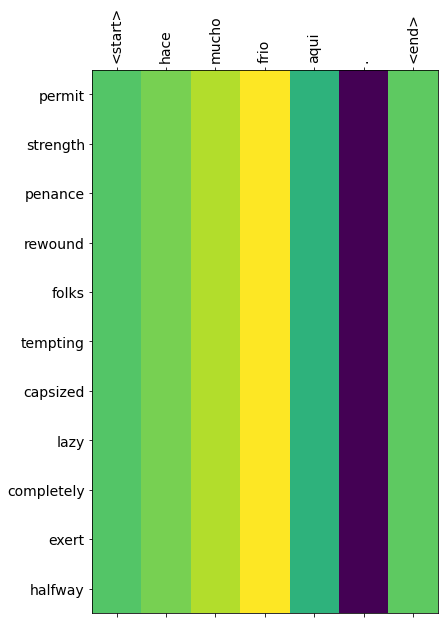

In [ ]:
translate(u'hace mucho frio aqui.')

Input: <start> esta es mi vida . <end>
Predicted translation: permit cleaning coat defendant obvious precise fishy suspicious resigned wings cooks 


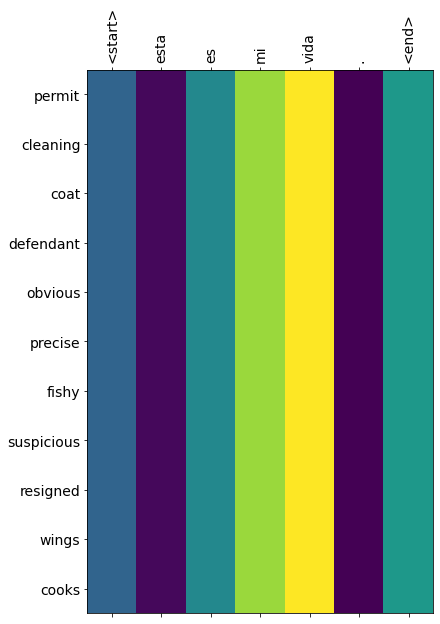

In [ ]:
translate(u'esta es mi vida.')

Input: <start> ¿ todavia estan en casa ? <end>
Predicted translation: permit motorcycle searching age spirit younger called lincoln suitcase fear apples 


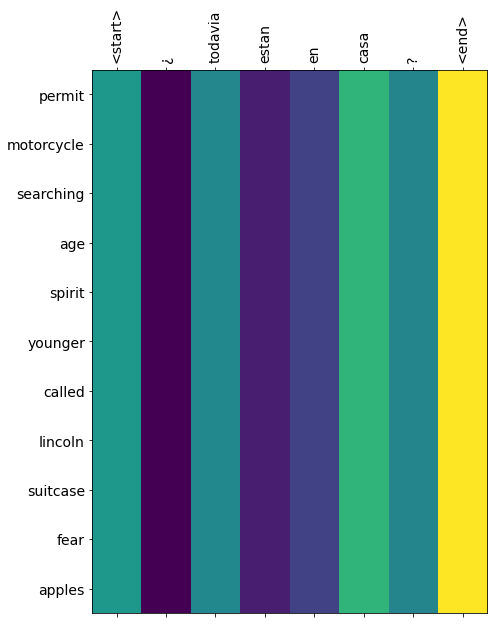

In [ ]:
translate(u'¿todavia estan en casa?')

Input: <start> trata de averiguarlo . <end>
Predicted translation: permit strength penance rewound folks tempting capsized lazy completely exert outwit 


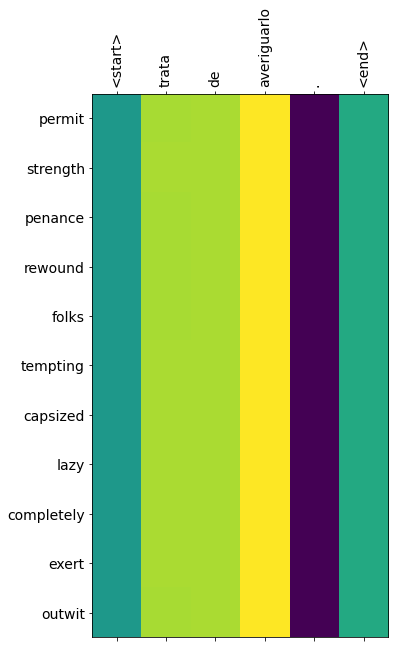

In [ ]:
translate(u'trata de averiguarlo.')

## 시계열 예측 분석

### 주가 예측

In [ ]:
import pandas as pd
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1FTi4EVmhxpH1sNVYSUP1hPEWERzekyai/view?usp=sharing'
file_id = orig_url.split('/')[-2] #파일 id 추출
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id #다운로드 url 지정
url = requests.get(dwn_url).text #dwn_url을 통해 request
csv_raw = StringIO(url) #객체 처리
df = pd.read_csv(csv_raw) #추출된 url read

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
apple_traning_dataset = df.copy()
apple_traning_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,79.117142,79.285713,77.375717,78.432854,68.502106,140129500
1,2013-01-03,78.268570,78.524284,77.285713,77.442856,67.637436,88241300
2,2013-01-04,76.709999,76.947144,75.118568,75.285713,65.753418,148583400
3,2013-01-07,74.571426,75.614288,73.599998,74.842857,65.366646,121039100
4,2013-01-08,75.601425,75.984283,74.464287,75.044289,65.542587,114676800


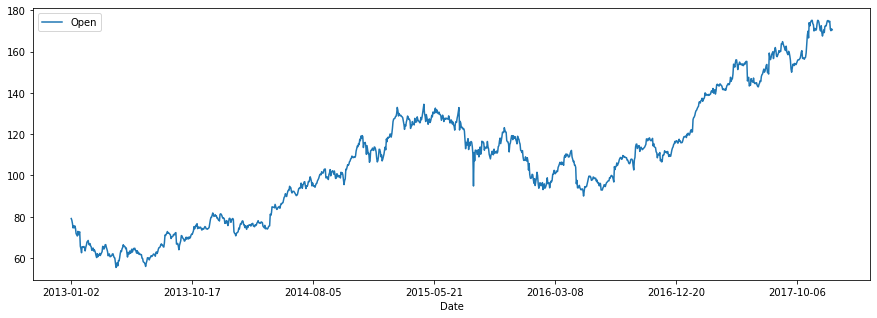

In [ ]:
apple_traning_dataset.plot(kind='line', x='Date', y='Open', figsize=(15,5))

In [ ]:
apple_traning_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
apple_traning_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,79.117142,79.285713,77.375717,78.432854,68.502106,140129500
1,2013-01-03,78.268570,78.524284,77.285713,77.442856,67.637436,88241300
2,2013-01-04,76.709999,76.947144,75.118568,75.285713,65.753418,148583400
3,2013-01-07,74.571426,75.614288,73.599998,74.842857,65.366646,121039100
4,2013-01-08,75.601425,75.984283,74.464287,75.044289,65.542587,114676800
...,...,...,...,...,...,...,...
1254,2017-12-22,174.679993,175.419998,174.500000,175.009995,169.009430,16349400
1255,2017-12-26,170.800003,171.470001,169.679993,170.570007,164.721680,33185500
1256,2017-12-27,170.100006,170.779999,169.710007,170.600006,164.750641,21498200
1257,2017-12-28,171.000000,171.850006,170.479996,171.080002,165.214188,16480200


In [ ]:
apple_traning_processed = apple_traning_dataset.iloc[:, 1:2].values
apple_traning_processed

array([[ 79.117142],
       [ 78.26857 ],
       [ 76.709999],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

apple_traning_scaled = scaler.fit_transform(apple_traning_processed)

In [ ]:
len(apple_traning_scaled)

1259

In [ ]:
features_set = [] #input
labels = [] #output
for i in range(60, 1259):
    features_set.append(apple_traning_scaled[i-60:i, 0])
    labels.append(apple_traning_scaled[i, 0])

In [ ]:
features_set, labels = np.array(features_set), np.array(labels)

In [ ]:
features_set.shape

(1199, 60)

In [ ]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [ ]:
features_set.shape

(1199, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
features_set.shape[1]

60

#### 실습: 주가 예측 모델링을 직접 구현해보세요

In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse'])

In [ ]:
labels

array([0.06437097, 0.04730244, 0.05180235, ..., 0.95814041, 0.96566005,
       0.96164958])

In [ ]:
model.fit(features_set, labels, epochs = 10, batch_size = 8)

Epoch 1/10
150/150 [==============================] - 5s 10ms/step - loss: 0.0418 - mse: 0.0418
Epoch 2/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0046 - mse: 0.0046
Epoch 3/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0038 - mse: 0.0038
Epoch 4/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0031 - mse: 0.0031
Epoch 5/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0036 - mse: 0.0036
Epoch 6/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0032 - mse: 0.0032
Epoch 7/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0029 - mse: 0.0029
Epoch 8/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0027 - mse: 0.0027
Epoch 9/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0025 - mse: 0.0025
Epoch 10/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0025 - mse: 0.0025


In [ ]:
orig_url='https://drive.google.com/file/d/13jF_7l_Dhjio_NEGi6ClBLOuPCsNlxzv/view?usp=sharing'
file_id = orig_url.split('/')[-2] #파일 id 추출
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id #다운로드 url 지정
url = requests.get(dwn_url).text #dwn_url을 통해 request
csv_raw = StringIO(url) #객체 처리
df2 = pd.read_csv(csv_raw) #추출된 url read

In [ ]:
apple_testing_complete = df2.copy()
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In [ ]:
apple_total = pd.concat((apple_traning_dataset['Open'], apple_testing_complete['Open']), axis=0)

In [ ]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [ ]:
test_inputs

array([154.179993, 154.970001, 155.809998, 156.059998, 155.970001,
       156.350006, 156.729996, 157.899994, 159.779999, 160.419998,
       156.75    , 156.610001, 156.889999, 156.289993, 156.910004,
       157.229996, 159.289993, 163.889999, 167.899994, 169.869995,
       166.600006, 174.      , 172.369995, 173.910004, 174.660004,
       175.110001, 175.110001, 173.5     , 173.039993, 169.970001,
       171.179993, 171.039993, 170.289993, 170.779999, 173.360001,
       175.100006, 175.050003, 174.300003, 172.630005, 170.429993,
       169.949997, 172.479996, 169.059998, 167.5     , 169.029999,
       170.490005, 169.199997, 172.149994, 172.5     , 172.399994,
       173.630005, 174.880005, 175.029999, 174.869995, 174.169998,
       174.679993, 170.800003, 170.100006, 171.      , 170.520004,
       170.160004, 172.529999, 172.539993, 173.440002, 174.350006,
       174.550003, 173.160004, 174.589996, 176.179993, 177.899994,
       176.149994, 179.369995, 178.610001, 177.300003, 177.300

In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [ ]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [ ]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [ ]:
predictions = model.predict(test_features)

In [ ]:
predictions = scaler.inverse_transform(predictions)

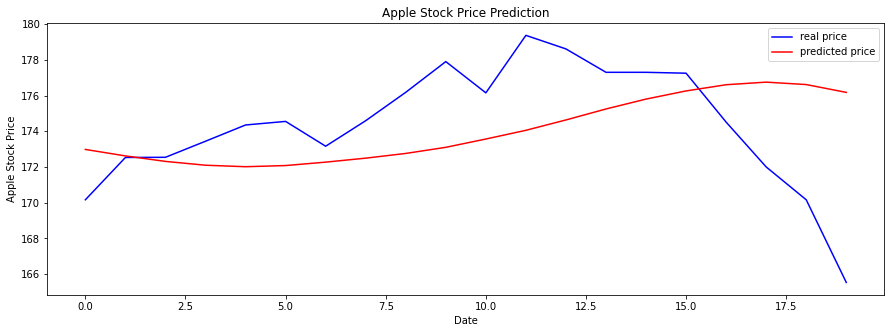

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(apple_testing_processed, color='blue', label='real price')
plt.plot(predictions , color='red', label='predicted price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

### 가정집 전력 사용량 예측

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Let`s import all packages that we may need:

import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to split the data into two parts
import sklearn
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [ ]:
## Data can be downloaded from: http://archive.ics.uci.edu/ml/machine-learning-databases/00235/
## Just open the zip file and grab the file 'household_power_consumption.txt' put it in the directory
## that you would like to run the code.


df = pd.read_csv('/content/drive/My Drive/data/household_power_consumption.txt', sep=';',
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.22,0.42,234.84,18.40,0.00,1.00,17.00
2006-12-16 17:25:00,5.36,0.44,233.63,23.00,0.00,1.00,16.00
2006-12-16 17:26:00,5.37,0.50,233.29,23.00,0.00,2.00,17.00
2006-12-16 17:27:00,5.39,0.50,233.74,23.00,0.00,1.00,17.00
2006-12-16 17:28:00,3.67,0.53,235.68,15.80,0.00,1.00,17.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00
mean,1.09,0.12,240.84,4.63,1.12,1.30,6.46
std,1.06,0.11,3.24,4.44,6.15,5.82,8.44
min,0.08,0.00,223.20,0.20,0.00,0.00,0.00
25%,0.31,0.05,238.99,1.40,0.00,0.00,0.00
50%,0.60,0.10,241.01,2.60,0.00,0.00,1.00
75%,1.53,0.19,242.89,6.40,0.00,1.00,17.00
max,11.12,1.39,254.15,48.40,88.00,80.00,31.00


In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
# another sanity check to make sure that there are not more any nan
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

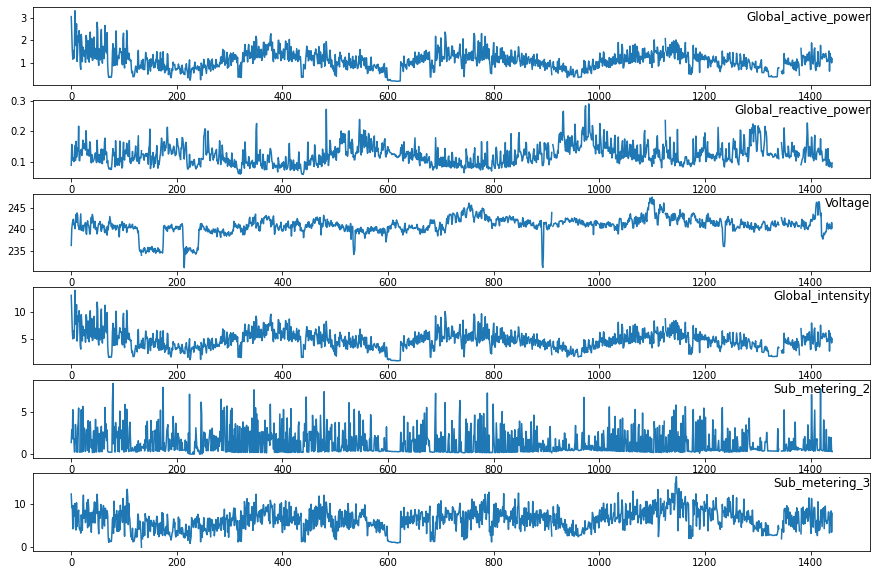

In [ ]:
# Below I compare the mean of different featuresresampled over day.
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
df.shape

(2075259, 7)

In [ ]:
## resampling of data over hour
df_resample = df.resample('h').mean()
df_resample.shape

(34589, 7)

In [ ]:
df_resample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.22,0.23,234.64,18.10,0.00,0.53,16.86
2006-12-16 18:00:00,3.63,0.08,234.58,15.60,0.00,6.72,16.87
2006-12-16 19:00:00,3.40,0.09,233.23,14.50,0.00,1.43,16.68
2006-12-16 20:00:00,3.27,0.08,234.07,13.92,0.00,0.00,16.78
2006-12-16 21:00:00,3.06,0.08,237.16,13.05,0.00,0.42,17.22


In [ ]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
# values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1       0.64       0.30       0.34       0.63       0.00       0.01   
2       0.55       0.10       0.34       0.54       0.00       0.14   
3       0.51       0.11       0.28       0.50       0.00       0.03   
4       0.49       0.10       0.32       0.48       0.00       0.00   
5       0.46       0.10       0.43       0.45       0.00       0.01   

   var7(t-1)  var1(t)  
1       0.78     0.55  
2       0.78     0.51  
3       0.77     0.49  
4       0.78     0.46  
5       0.80     0.32  


In [ ]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7) (8760,) (25399, 1, 7) (25399,)


In [ ]:
train_X.shape[0]

8760

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/10
126/126 - 3s - loss: 0.0206 - val_loss: 0.0122
Epoch 2/10
126/126 - 1s - loss: 0.0128 - val_loss: 0.0107
Epoch 3/10
126/126 - 1s - loss: 0.0116 - val_loss: 0.0098
Epoch 4/10
126/126 - 1s - loss: 0.0109 - val_loss: 0.0094
Epoch 5/10
126/126 - 1s - loss: 0.0108 - val_loss: 0.0094
Epoch 6/10
126/126 - 1s - loss: 0.0108 - val_loss: 0.0092
Epoch 7/10
126/126 - 1s - loss: 0.0107 - val_loss: 0.0093
Epoch 8/10
126/126 - 1s - loss: 0.0107 - val_loss: 0.0093
Epoch 9/10
126/126 - 1s - loss: 0.0106 - val_loss: 0.0093
Epoch 10/10
126/126 - 1s - loss: 0.0107 - val_loss: 0.0092


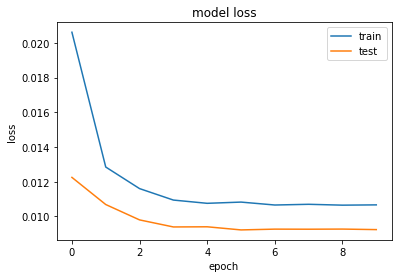

Test RMSE: 0.619


In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

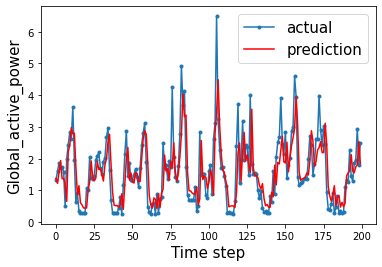

In [ ]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
inv_y #실제 값

array([1.33906667, 1.60146667, 1.8706    , ..., 1.65933333, 1.1637    ,
       0.93466667])